In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [28]:
# === Cargar datos ===
df = pd.read_csv("Estadisticas_2024_limpio/stats_Hard.csv")

In [29]:
top10 = [
    'Alexander Zverev', 'Andrey Rublev', 'Carlos Alcaraz', 'Casper Ruud', 'Daniil Medvedev',
    'Holger Rune', 'Hubert Hurkacz', 'Jannik Sinner', 'Novak Djokovic', 'Stefanos Tsitsipas'
]

buen saque y buen resto: sinner, alcaraz y djokovic
mal saque y buen resto: medvedvev
buen saque  y  resto normal: zverez, rublev y hurckaz
normal saque y resto normal: Casper Ruud Holger Rune Stefanos Tsitsipas

saque difieren: alcaraz, djokovic, rublev en vez de bueno, normal


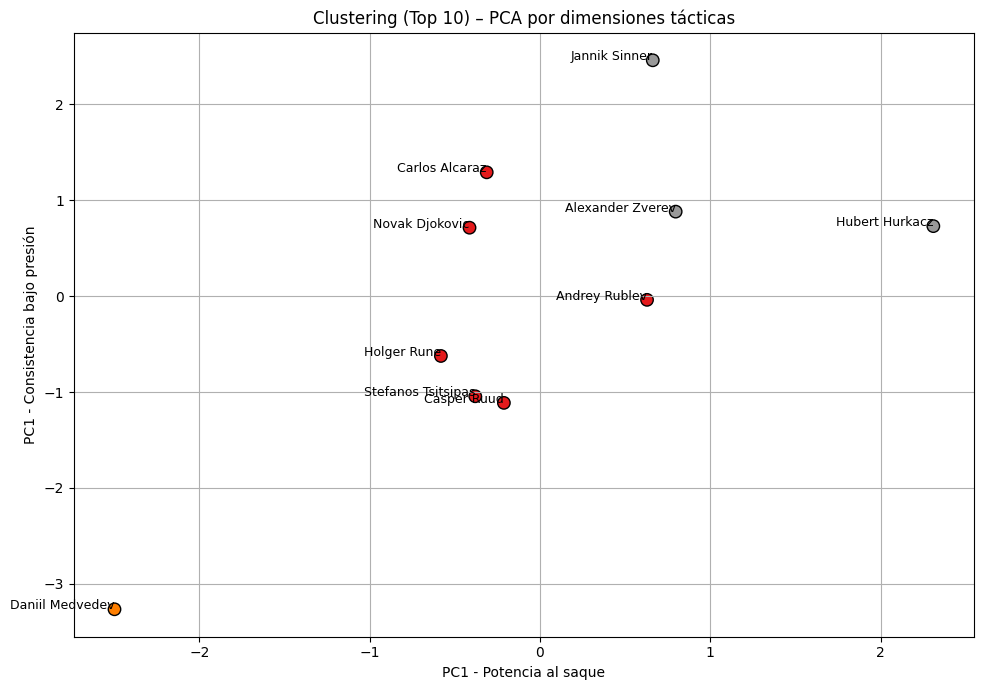


Cluster 0:
    Carlos Alcaraz
    Novak Djokovic
       Casper Ruud
       Holger Rune
     Andrey Rublev
Stefanos Tsitsipas

Cluster 1:
Daniil Medvedev

Cluster 2:
   Jannik Sinner
Alexander Zverev
  Hubert Hurkacz

=== Contribución de cada variable a PC1 (potencia al saque) ===
Ace%    0.7071
DF%    -0.7071
dtype: float64

=== Contribución de cada variable a PC1 (consistencia bajo presión) ===
Hld%      0.6325
1st%      0.5784
2%-InP    0.5151
dtype: float64


In [71]:
# === 1. Filtrar solo los jugadores top 10 ===
df_top10 = df[df['Player'].isin(top10)].copy()

# === 2. Define tus dos grupos conceptuales de variables ===
# Grupo ofensivo / potencia al saque
variables_x = ['Ace%', 'DF%']  # Eje X

# Grupo de consistencia / defensa bajo presión
variables_y = ['Hld%','1st%', '2%-InP']  # Eje Y

# === 3. Escalar cada grupo por separado ===
scaler_x = StandardScaler()
X_x_scaled = scaler_x.fit_transform(df_top10[variables_x])

scaler_y = StandardScaler()
X_y_scaled = scaler_y.fit_transform(df_top10[variables_y])

# === 4. PCA en cada grupo ===
pca_x = PCA(n_components=1)
pca_y = PCA(n_components=1)

PC1_x = pca_x.fit_transform(X_x_scaled).flatten()
PC1_y = pca_y.fit_transform(X_y_scaled).flatten()

# === 5. Agregar componentes al DataFrame ===
df_top10['PC1_X'] = PC1_x  # Potencia al saque
df_top10['PC1_Y'] = PC1_y  # Consistencia / presión

# === 6. Clustering (opcional) ===
X_custom = df_top10[['PC1_X', 'PC1_Y']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_top10['Cluster'] = kmeans.fit_predict(X_custom)

# === 7. Gráfico personalizado ===
plt.figure(figsize=(10, 7))
plt.scatter(df_top10['PC1_X'], df_top10['PC1_Y'], c=df_top10['Cluster'], cmap='Set1', s=80, edgecolor='k')

for _, row in df_top10.iterrows():
    plt.text(row['PC1_X'], row['PC1_Y'], row['Player'], fontsize=9, ha='right')

plt.xlabel("PC1 - Potencia al saque")
plt.ylabel("PC1 - Consistencia bajo presión")
plt.title("Clustering (Top 10) – PCA por dimensiones tácticas")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Mostrar jugadores por clúster ===
for c in sorted(df_top10['Cluster'].unique()):
    print(f"\nCluster {c}:")
    print(df_top10[df_top10['Cluster'] == c]['Player'].to_string(index=False))

# === 9. Mostrar pesos (loading) de cada variable en su componente ===
print("\n=== Contribución de cada variable a PC1 (potencia al saque) ===")
print(pd.Series(pca_x.components_[0], index=variables_x).round(4))

print("\n=== Contribución de cada variable a PC1 (consistencia bajo presión) ===")
print(pd.Series(pca_y.components_[0], index=variables_y).round(4))

JUGADORES BUENOS AL SAQUE
JUGADORES NORMALES AL SAQUE
JUGADORES no destaca AL SAQUE

cluster 2: JUGADORES BUENOS AL SAQUE
cluster 0: JUGADORES NORMALES AL SAQUE
cluster 1: JUGADORES MALOS AL SAQUE

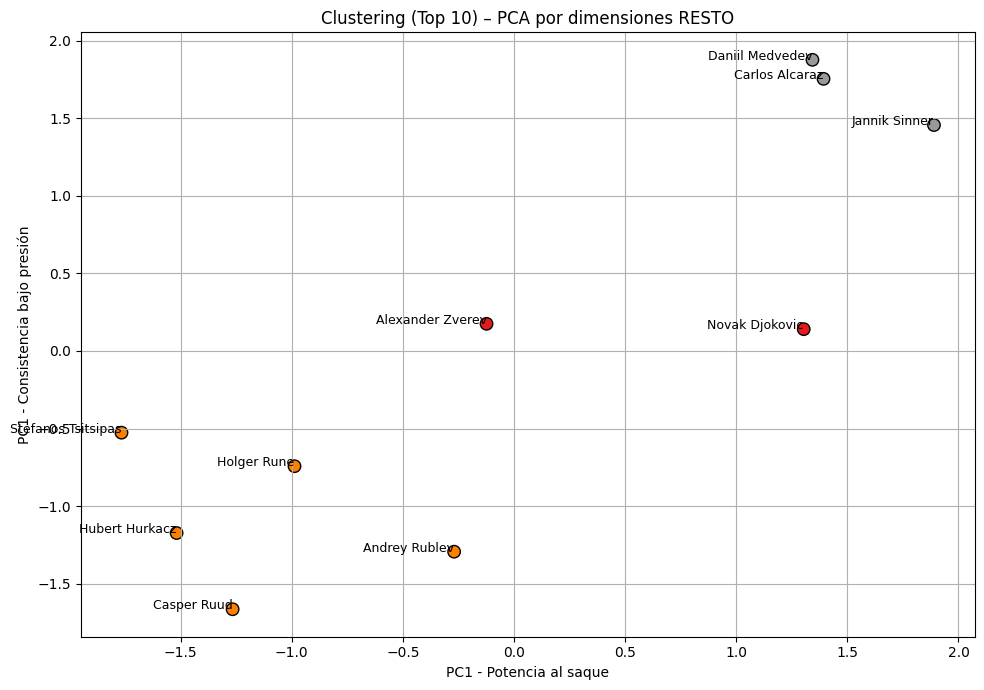


Cluster 0:
Alexander Zverev
  Novak Djokovic

Cluster 1:
       Casper Ruud
       Holger Rune
     Andrey Rublev
Stefanos Tsitsipas
    Hubert Hurkacz

Cluster 2:
  Jannik Sinner
 Carlos Alcaraz
Daniil Medvedev

=== Contribución de cada variable a PC1 (potencia al saque) ===
v1st%    0.7071
v2nd%    0.7071
dtype: float64

=== Contribución de cada variable a PC1 (consistencia bajo presión) ===
RPW      0.7071
vAce%   -0.7071
dtype: float64


In [79]:
# === 1. Filtrar solo los jugadores top 10 ===
df_top10 = df[df['Player'].isin(top10)].copy()

# === 2. Define tus dos grupos conceptuales de variables ===
# Grupo ofensivo / potencia al saque
variables_x = ['v1st%', 'v2nd%']  # Eje X

# Grupo de consistencia / defensa bajo presión
variables_y = ['RPW', 'vAce%']  # Eje Y

# === 3. Escalar cada grupo por separado ===
scaler_x = StandardScaler()
X_x_scaled = scaler_x.fit_transform(df_top10[variables_x])

scaler_y = StandardScaler()
X_y_scaled = scaler_y.fit_transform(df_top10[variables_y])

# === 4. PCA en cada grupo ===
pca_x = PCA(n_components=1)
pca_y = PCA(n_components=1)

PC1_x = pca_x.fit_transform(X_x_scaled).flatten()
PC1_y = pca_y.fit_transform(X_y_scaled).flatten()

# === 5. Agregar componentes al DataFrame ===
df_top10['PC1_X'] = PC1_x  # Potencia al saque
df_top10['PC1_Y'] = PC1_y  # Consistencia / presión

# === 6. Clustering (opcional) ===
X_custom = df_top10[['PC1_X', 'PC1_Y']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_top10['Cluster'] = kmeans.fit_predict(X_custom)

# === 7. Gráfico personalizado ===
plt.figure(figsize=(10, 7))
plt.scatter(df_top10['PC1_X'], df_top10['PC1_Y'], c=df_top10['Cluster'], cmap='Set1', s=80, edgecolor='k')

for _, row in df_top10.iterrows():
    plt.text(row['PC1_X'], row['PC1_Y'], row['Player'], fontsize=9, ha='right')

plt.xlabel("PC1 - Potencia al saque")
plt.ylabel("PC1 - Consistencia bajo presión")
plt.title("Clustering (Top 10) – PCA por dimensiones RESTO")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Mostrar jugadores por clúster ===
for c in sorted(df_top10['Cluster'].unique()):
    print(f"\nCluster {c}:")
    print(df_top10[df_top10['Cluster'] == c]['Player'].to_string(index=False))

# === 9. Mostrar pesos (loading) de cada variable en su componente ===
print("\n=== Contribución de cada variable a PC1 (potencia al saque) ===")
print(pd.Series(pca_x.components_[0], index=variables_x).round(4))

print("\n=== Contribución de cada variable a PC1 (consistencia bajo presión) ===")
print(pd.Series(pca_y.components_[0], index=variables_y).round(4))


cluster 0: BUENOS AL RESTO
cluster 1: NORMALES AL RESTO
CLUSTER 2: MUY BUENOS AL RESTO


INCLUIR LA MEDIA DEL RK DESDE 0 PODRIA SER UTIL, PARA EL FINAL

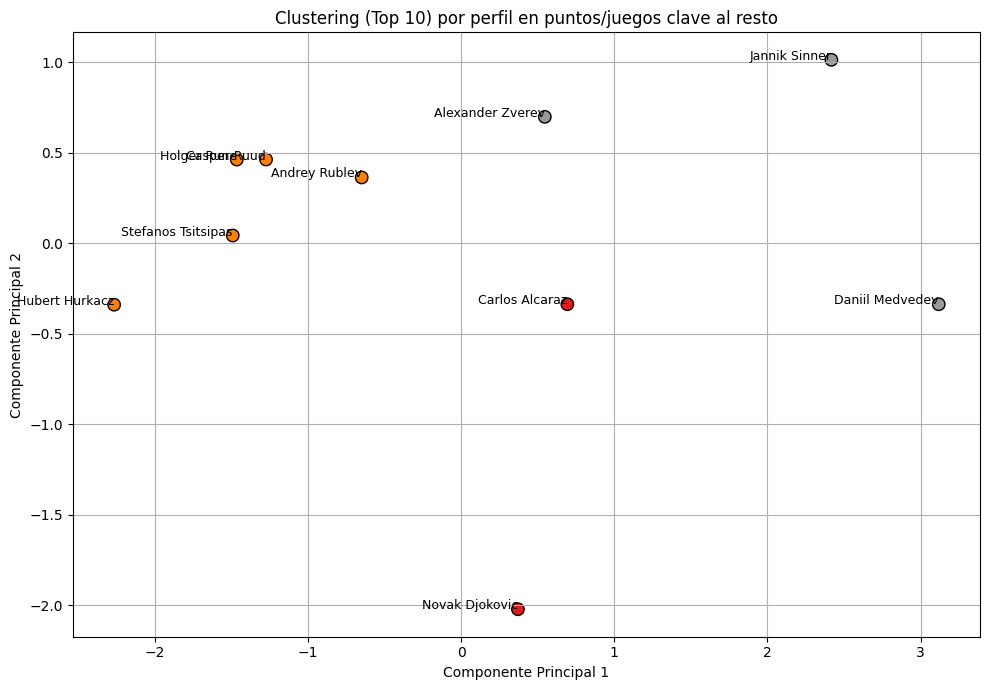


Cluster 0:
Carlos Alcaraz
Novak Djokovic

Cluster 1:
       Casper Ruud
       Holger Rune
     Andrey Rublev
Stefanos Tsitsipas
    Hubert Hurkacz

Cluster 2:
   Jannik Sinner
Alexander Zverev
 Daniil Medvedev


In [89]:
# === 3. Filtrar solo los top 10 ===
df_top10 = df[df['Player'].isin(top10)].copy()

# === 4. Variables del perfil de breaks ===
variables_break = ['BPConv%', 'BPChnc', 'Bks/M', 'BP/M']
X = df_top10[variables_break]

# === 5. Normalización ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 6. PCA a 2 componentes ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === 7. KMeans sobre los 10 jugadores ===
kmeans = KMeans(n_clusters=3, random_state=42)  # Cambia k si quieres más clústeres
df_top10['Cluster'] = kmeans.fit_predict(X_scaled)

# === 8. Agregar PCA al DataFrame ===
df_top10['PCA1'] = X_pca[:, 0]
df_top10['PCA2'] = X_pca[:, 1]

# === 9. Gráfico ===
plt.figure(figsize=(10, 7))
plt.scatter(df_top10['PCA1'], df_top10['PCA2'], c=df_top10['Cluster'], cmap='Set1', s=80, edgecolor='k')

for _, row in df_top10.iterrows():
    plt.text(row['PCA1'], row['PCA2'], row['Player'], fontsize=9, ha='right')

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clustering (Top 10) por perfil en puntos/juegos clave al resto")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 10. Mostrar jugadores por clúster ===
for c in sorted(df_top10['Cluster'].unique()):
    print(f"\nCluster {c}:")
    print(df_top10[df_top10['Cluster'] == c]['Player'].to_string(index=False))

cluster 0: tienen pocas pero eficaces
cluster 1: tienen pocas y no las aprovechan

cluster 2: tienen muchas y muy eficaces

In [64]:
# === Mostrar pesos de las variables en cada componente ===
pca_weights = pd.DataFrame(
    pca.components_,
    columns=variables_break,
    index=['Componente 1', 'Componente 2']
).T  # Transponemos para ver variables como filas

print("\n=== Peso de cada variable en las componentes principales ===")
print(pca_weights.round(4))


=== Peso de cada variable en las componentes principales ===
         Componente 1  Componente 2
BPConv%        0.4574        0.2173
BPChnc         0.4142        0.7998
Bks/M          0.5758       -0.3216
BP/M           0.5364       -0.4578


%bp convertidas, mas es mejor
oportunidades de break, mas significa que tienes muchas
Bks/M, return game won
BP/M break points que tiene por partido

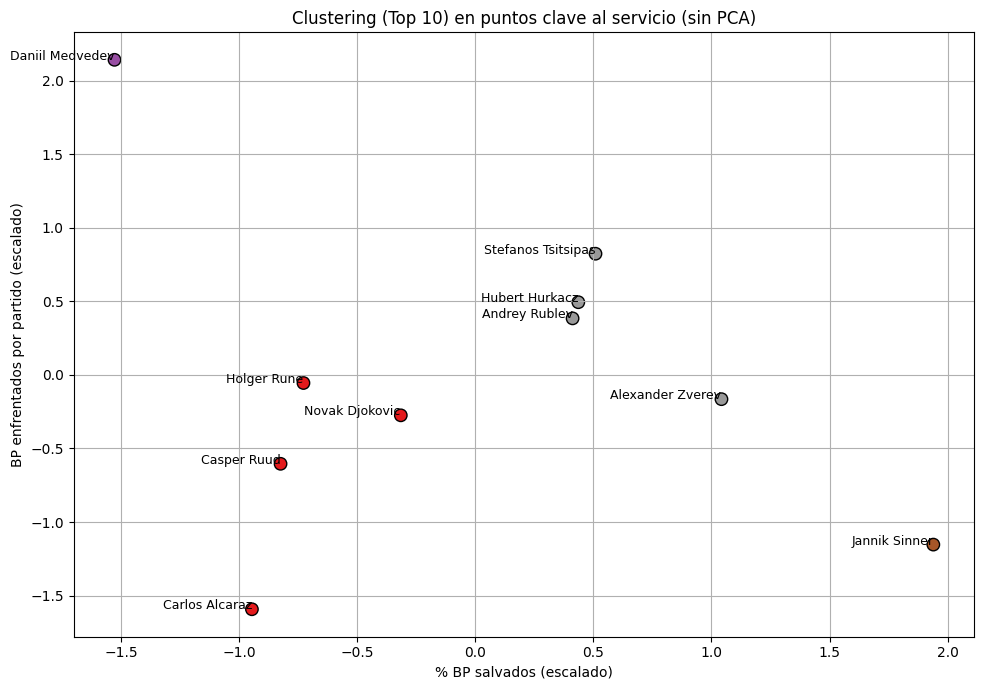


Cluster 0:
Carlos Alcaraz
Novak Djokovic
   Casper Ruud
   Holger Rune

Cluster 1:
Daniil Medvedev

Cluster 2:
Jannik Sinner

Cluster 3:
  Alexander Zverev
     Andrey Rublev
Stefanos Tsitsipas
    Hubert Hurkacz


In [85]:
# === 3. Filtrar solo los top 10 ===
df_top10 = df[df['Player'].isin(top10)].copy()

# === 4. Variables del perfil de breaks ===
variables_breakser = ['BPSvd%', 'BPvs/M']
X = df_top10[variables_breakser]

# === 5. Normalización ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 6. KMeans sobre los 10 jugadores ===
kmeans = KMeans(n_clusters=4, random_state=42)
df_top10['Cluster'] = kmeans.fit_predict(X_scaled)

# === 7. Agregar variables escaladas para graficar ===
df_top10['BPSvd%_scaled'] = X_scaled[:, 0]
df_top10['BPvs/M_scaled'] = X_scaled[:, 1]

# === 8. Gráfico ===
plt.figure(figsize=(10, 7))
plt.scatter(df_top10['BPSvd%_scaled'], df_top10['BPvs/M_scaled'], 
            c=df_top10['Cluster'], cmap='Set1', s=80, edgecolor='k')

for _, row in df_top10.iterrows():
    plt.text(row['BPSvd%_scaled'], row['BPvs/M_scaled'], row['Player'], fontsize=9, ha='right')

plt.xlabel("% BP salvados (escalado)")
plt.ylabel("BP enfrentados por partido (escalado)")
plt.title("Clustering (Top 10) en puntos clave al servicio (sin PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 9. Mostrar jugadores por clúster ===
for c in sorted(df_top10['Cluster'].unique()):
    print(f"\nCluster {c}:")
    print(df_top10[df_top10['Cluster'] == c]['Player'].to_string(index=False))

cluster 2: se enfrenta a muy pocos y los salva mucho

cluster 1: se enfrenta a muchos y no los salva

cluster 0: se enfrentan a pocos y no los salvan

cñuster 3: se enfrentan a bastantes pero los salvan